# Import dataset

In [1]:
import os
import numpy as np
import pandas as pd
import random

df = pd.read_csv("final_results.csv")

df.head()

,body,pred_int_labels,score,successful,delta,active_subreddit,values
0,The argument: 'I second the legal aspect. Whil...,[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. ...,9.0,True,False,Lifestyle,"Security: personal,Tradition,Conformity: rules..."
1,The argument: 'How do you feel about 14-year-o...,[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. ...,5.0,True,False,General,"Self-direction: action,Achievement,Power: reso..."
2,The argument: 'Hate speech provides nothing us...,[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. ...,0.0,False,False,General,"Self-direction: thought,Self-direction: action..."
3,The argument: 'I don't disagree that it's okay...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. ...,1.0,True,True,Lifestyle,"Self-direction: thought,Self-direction: action..."
4,The argument: 'If you're a good parent then yo...,[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ...,1.0,True,False,News and Politics,"Self-direction: action,Achievement,Benevolence..."


# Descriptive

### Set colors

In [5]:
import matplotlib.pyplot as plt

# Define a custom color palette
color_palette = plt.get_cmap('tab20')

# Split the 'values' column into multiple columns using get_dummies
df_values = df['values'].str.get_dummies(sep=',')

# Concatenate the original DataFrame with the new dummy variable columns
df_concat = pd.concat([df, df_values], axis=1)

### Frequency of value per category

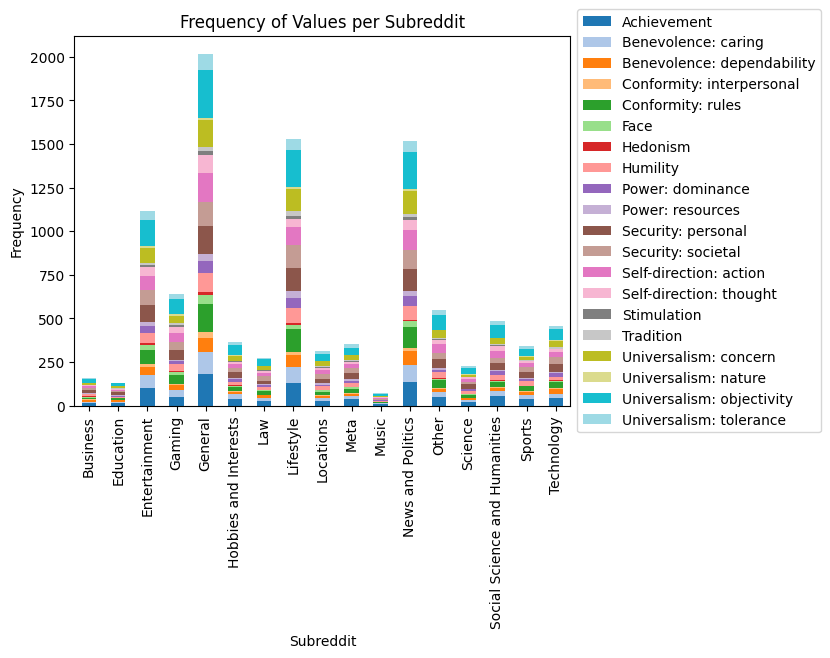

In [6]:
# Count the frequency of values per subreddit
value_counts = df_concat.groupby('active_subreddit')[df_values.columns].sum()

# Plot the frequency of values per subreddit
value_counts.plot(kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Frequency of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Percentage of value per category

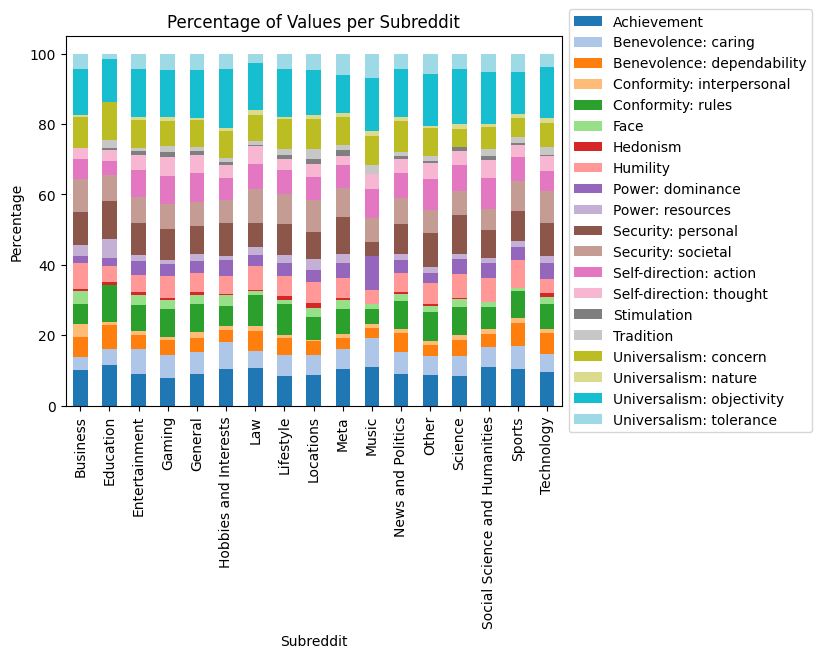

In [7]:
# Calculate the percentage of values per subreddit
value_counts = df_concat.groupby('active_subreddit')[df_values.columns].sum()
value_totals = value_counts.sum(axis=1)
value_percentages = value_counts.divide(value_totals, axis=0) * 100

# Plot the percentages of values per subreddit
value_percentages.plot(kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Percentage of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Percentage')

# Display the plot
plt.show()

### Frequency of value per succesful or not per category


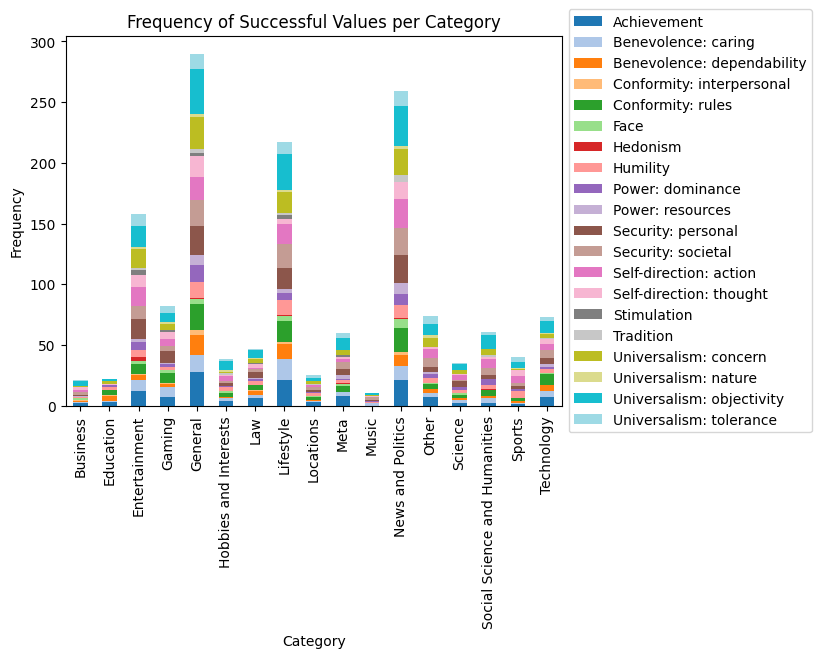

In [8]:
# Split the 'values' column into multiple columns
df_values = df['values'].str.split(',', expand=True)

# Stack the values columns to create a single column
df_values_stacked = df_values.stack().reset_index(level=1, drop=True).rename('values')

# Create a new DataFrame with stacked values and successful flag
df_success_stacked = pd.concat([df['active_subreddit'], df_values_stacked, df['delta']], axis=1)

# Filter the DataFrame to include only successful rows
df_success = df_success_stacked[df_success_stacked['delta']]

# Create a pivot table to calculate the frequency of successful values per category
success_counts = df_success.pivot_table(index='active_subreddit', columns='values', values='delta', aggfunc='size', fill_value=0)

# Reset the index of the pivot table
success_counts.reset_index(inplace=True)

# Plot the frequency of successful values per category
success_counts.plot(x='active_subreddit', kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Frequency of Successful Values per Category')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Inferential

The results of the chi-square test provide information about the association between successful values and subreddits. Specifically, the test helps determine if the distribution of (successful) values differs significantly across different subreddits.

The chi-square statistic measures the overall difference between the observed frequencies and the expected frequencies under the assumption of independence. A higher chi-square value indicates a larger deviation from the expected frequencies, suggesting a stronger association between the variables.

The p-value associated with the chi-square statistic indicates the statistical significance of the observed association. A small p-value (typically below a predetermined significance level, such as 0.05) suggests that the observed association is unlikely to have occurred by chance alone. In other words, a small p-value indicates that there is evidence of a significant relationship between successful values and subreddits.

Interpreting the results:

If the chi-square statistic is large and the p-value is small (below the significance level), it suggests that there is a statistically significant association between successful values and subreddits. The variables are likely dependent on each other, and the distribution of successful values differs across subreddits.

If the chi-square statistic is small and the p-value is large (above the significance level), it suggests that there is no strong evidence of an association between successful values and subreddits. The variables may be independent, and any observed differences in the distribution of successful values could be due to random chance.

### Chi square over distribution of values

In [17]:
from scipy.stats import chi2_contingency

# Calculate the value counts across all subreddits
total_value_counts = df['values'].str.split(',', expand=True).stack().value_counts()

list_all_values = list(total_value_counts.index)

for subreddit in df['active_subreddit'].unique():

    subreddit_df = df[df['active_subreddit'] == subreddit]

    # Group the DataFrame by 'values' and count the frequency
    value_counts = subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    list_subreddit_values = list(value_counts.index)

    missing_values = list(set(list_all_values) - set(list_subreddit_values))
    #print(missing_values)
    
    if len(missing_values) > 0:
        for missing_val in missing_values:
            value_counts[missing_val] = 0

    # Perform chi-squared test
    chi2, p_value, dof, expected = chi2_contingency([value_counts.to_list(),total_value_counts.to_list()])

    # Print the results
    print(subreddit)
    print("Chi-squared statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)

Lifestyle
Chi-squared statistic: 6.599347538443764
P-value: 0.9960628952260304
Degrees of freedom: 19
General
Chi-squared statistic: 8.339100851278115
P-value: 0.9829214763014923
Degrees of freedom: 19
News and Politics
Chi-squared statistic: 5.735896663580773
P-value: 0.9984832389531256
Degrees of freedom: 19
Business
Chi-squared statistic: 7.150154932513107
P-value: 0.993368651140376
Degrees of freedom: 19
Gaming
Chi-squared statistic: 3.5349422639265184
P-value: 0.9999595879315397
Degrees of freedom: 19
Social Science and Humanities
Chi-squared statistic: 8.360389949947088
P-value: 0.9826627391330736
Degrees of freedom: 19
Entertainment
Chi-squared statistic: 5.9536711430278375
P-value: 0.998036010096691
Degrees of freedom: 19
Hobbies and Interests
Chi-squared statistic: 8.070442949849353
P-value: 0.9859479272031738
Degrees of freedom: 19
Music
Chi-squared statistic: 3.251704734914066
P-value: 0.9999792649371375
Degrees of freedom: 19
Technology
Chi-squared statistic: 6.640069565112

### Chi square over distribution of succesful values

In [23]:
from scipy.stats import chi2_contingency

successful_df = df[df['delta']]

# Calculate the value counts across all subreddits
total_value_counts = successful_df['values'].str.split(',', expand=True).stack().value_counts()

list_all_values = list(total_value_counts.index)

for subreddit in successful_df['active_subreddit'].unique():

    subreddit_df = successful_df[successful_df['active_subreddit'] == subreddit]

    # Group the DataFrame by 'values' and count the frequency
    value_counts = subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    list_subreddit_values = list(value_counts.index)

    missing_values = list(set(list_all_values) - set(list_subreddit_values))
    #print(missing_values)
    
    if len(missing_values) > 0:
        for missing_val in missing_values:
            value_counts[missing_val] = 0

    # Perform chi-squared test
    chi2, p_value, dof, expected = chi2_contingency([value_counts.to_list(),total_value_counts.to_list()])

    # Print the results
    print(subreddit)
    print("Chi-squared statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)

Lifestyle
Chi-squared statistic: 6.319577041649218
P-value: 0.9970516131312547
Degrees of freedom: 19
Business
Chi-squared statistic: 3.2671330830624283
P-value: 0.9999784598277816
Degrees of freedom: 19
Gaming
Chi-squared statistic: 2.9914108136663207
P-value: 0.9999894590936629
Degrees of freedom: 19
General
Chi-squared statistic: 2.532772924918864
P-value: 0.9999973380680989
Degrees of freedom: 19
News and Politics
Chi-squared statistic: 7.685974348504108
P-value: 0.989561150950516
Degrees of freedom: 19
Social Science and Humanities
Chi-squared statistic: 5.611608815352453
P-value: 0.9986990601151772
Degrees of freedom: 19
Entertainment
Chi-squared statistic: 5.773448913181047
P-value: 0.9984126364848313
Degrees of freedom: 19
Hobbies and Interests
Chi-squared statistic: 5.769205593518576
P-value: 0.998420744670456
Degrees of freedom: 19
Music
Chi-squared statistic: 5.52119343636789
P-value: 0.9988398639160445
Degrees of freedom: 19
Technology
Chi-squared statistic: 4.0312417318981

### Distribution of successful values vs distribution of all values

In [30]:
from scipy.stats import chi2_contingency

successful_df = df[df['delta']]

for subreddit in df['active_subreddit'].unique():

    subreddit_df = df[df['active_subreddit'] == subreddit]

    # Group the DataFrame by 'values' and count the frequency
    value_counts = subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    list_subreddit_values = list(value_counts.index)

    successful_subreddit_df = successful_df[successful_df['active_subreddit'] == subreddit]

    # Group the DataFrame by 'values' and count the frequency
    successful_value_counts = successful_subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    successful_list_subreddit_values = list(successful_value_counts.index)

    successful_missing_values = list(set(list_subreddit_values) - set(successful_list_subreddit_values))
    #print(missing_values)
    
    if len(successful_missing_values) > 0:
        for missing_val in successful_missing_values:
            successful_value_counts[missing_val] = 0

    # Perform chi-squared test
    chi2, p_value, dof, expected = chi2_contingency([successful_value_counts.to_list(),value_counts.to_list()])

    # Print the results
    print(subreddit)
    print("Chi-squared statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)

Lifestyle
Chi-squared statistic: 4.3996526492737145
P-value: 0.9997798810226227
Degrees of freedom: 19
General
Chi-squared statistic: 3.510784406162037
P-value: 0.9999617274994437
Degrees of freedom: 19
News and Politics
Chi-squared statistic: 8.028846749901458
P-value: 0.9863782607612416
Degrees of freedom: 19
Business
Chi-squared statistic: 2.374270999959813
P-value: 0.9999874615297097
Degrees of freedom: 17
Gaming
Chi-squared statistic: 2.6298510346193673
P-value: 0.9999963564232832
Degrees of freedom: 19
Social Science and Humanities
Chi-squared statistic: 5.038443113464835
P-value: 0.9993983077243966
Degrees of freedom: 19
Entertainment
Chi-squared statistic: 5.47551187863115
P-value: 0.9989061463662101
Degrees of freedom: 19
Hobbies and Interests
Chi-squared statistic: 3.462920218222462
P-value: 0.9999656835719074
Degrees of freedom: 19
Music
Chi-squared statistic: 3.6783276882934417
P-value: 0.9993552604279112
Degrees of freedom: 16
Technology
Chi-squared statistic: 3.1197284493

In [13]:
# Filter the DataFrame to include only successful values
successful_df = df[df['delta']]

# Calculate the value counts of successful values per subreddit and perform chi-squared test
for subreddit in successful_df['active_subreddit'].unique():
    # Filter the DataFrame for the specific 'active_subreddit'
    successful_subreddit_df = successful_df[successful_df['active_subreddit'] == subreddit]
    
    # Group the DataFrame by 'values' and count the frequency of successful values
    successful_value_counts = subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    
    # Normalize the value counts
    successful_value_counts_normalized = value_counts / value_counts.sum()
    
    successful_missing_values = list(set(list_all_values) - set(list_subreddit_values))
    
    if len(successful_missing_values) > 0:
        for missing_val in successful_missing_values:
            successful_value_counts_normalized[missing_val] = 0
    

    # Filter the DataFrame for the specific 'active_subreddit'
    subreddit_df = df[df['active_subreddit'] == subreddit]
    
    # Group the DataFrame by 'values' and count the frequency
    value_counts = subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    
    # Normalize the value counts
    value_counts_normalized = value_counts / value_counts.sum()
    list_subreddit_values = list(value_counts_normalized.index)
    
    missing_values = list(set(list_all_values) - set(list_subreddit_values))
    
    if len(missing_values) > 0:
        for missing_val in missing_values:
            value_counts_normalized[missing_val] = 0

    # Perform chi-squared test
    print("Active Subreddit:", subreddit)
    try:
        chi2, p_value = chisquare(value_counts_normalized, successful_value_counts_normalized)
    
        print("Chi-square statistic:", chi2)
        print("P-value:", p_value)
        print()
    except:
        print("chi square failed")

Active Subreddit: Lifestyle
Chi-square statistic: 0.021855314601428144
P-value: 1.0

Active Subreddit: Business
Chi-square statistic: 0.03988012446487126
P-value: 1.0

Active Subreddit: Gaming
Chi-square statistic: inf
P-value: 0.0

Active Subreddit: General
Chi-square statistic: 0.0053250470362956005
P-value: 1.0

Active Subreddit: News and Politics
Chi-square statistic: 0.003937905522721338
P-value: 1.0

Active Subreddit: Social Science and Humanities
Chi-square statistic: 0.017077996481147214
P-value: 1.0

Active Subreddit: Entertainment
Chi-square statistic: 0.03792145747790958
P-value: 1.0

Active Subreddit: Hobbies and Interests
Chi-square statistic: 0.02090734589941291
P-value: 1.0

Active Subreddit: Music
Chi-square statistic: 0.035420829393667974
P-value: 1.0

Active Subreddit: Technology
Chi-square statistic: inf
P-value: 0.0

Active Subreddit: Science
Chi-square statistic: 0.01809767546974892
P-value: 1.0

Active Subreddit: Other
Chi-square statistic: inf
P-value: 0.0

Activ

/Users/barberademol/Desktop/DRL/drlvenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/barberademol/Desktop/DRL/drlvenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/barberademol/Desktop/DRL/drlvenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/barberademol/Desktop/DRL/drlvenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/barberademol/Desktop/DRL/drlvenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/barberademol/Deskto

# Correlation

correlation efficient between pairs of values: expressed together or mutually exclusive?

Correlation Matrix:
                            Achievement  Benevolence: caring   
Achievement                    1.000000            -0.081015  \
Benevolence: caring           -0.081015             1.000000   
Benevolence: dependability    -0.068745            -0.055411   
Conformity: interpersonal     -0.035265            -0.028425   
Conformity: rules             -0.092255            -0.074361   
Face                          -0.046255            -0.037283   
Hedonism                      -0.026820            -0.021618   
Humility                      -0.077419            -0.062402   
Power: dominance              -0.061851            -0.049854   
Power: resources              -0.045060            -0.036320   
Security: personal            -0.097732            -0.078775   
Security: societal            -0.090606            -0.073031   
Self-direction: action        -0.089184            -0.071885   
Self-direction: thought       -0.066825            -0.053863   
Stimulation         

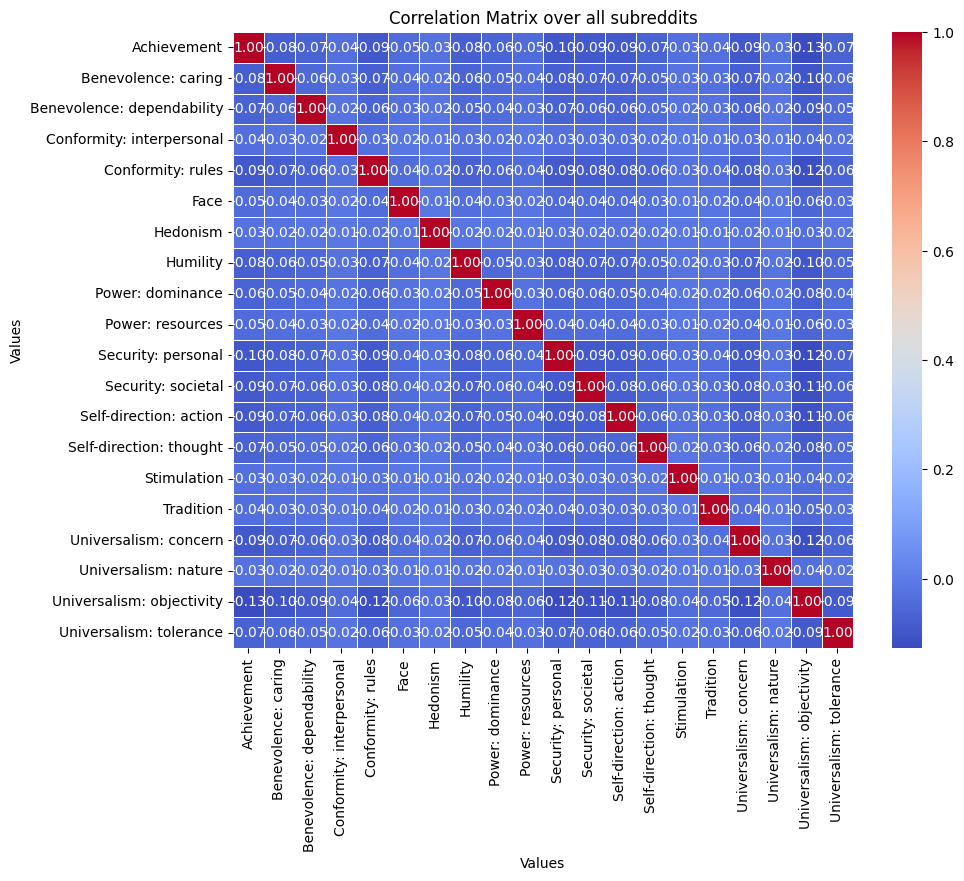

In [14]:
import seaborn as sns

# Split the 'values' column into multiple entries
df_values = df['values'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('values')

# Create a new DataFrame with the expanded 'values' column
expanded_df = df.loc[df.index.repeat(df['values'].str.count(',') + 1)].copy()
expanded_df['values'] = df_values

# Calculate the correlation coefficient between pairs of values
correlation_matrix = expanded_df['values'].str.get_dummies().corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix over all subreddits')
plt.xlabel('Values')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [11]:
df.delta.value_counts()

delta
False    2218
True      355
Name: count, dtype: int64